# SVM
매우 강력하고 선형이나 비선형 분류, 회귀, 이상치 탐색에도 사용할 수 있는 머신러닝 모델입니다.
SVM은 특히 **복잡한 분류** 문제에 잘 들어맞으며 작거나 중간 크기에 데이터셋에 적합합니다.

참고 : 핸즈온 머신러닝 책

### import 정의

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
import warnings 
warnings.filterwarnings('ignore')

### data 로드

In [5]:
delivery_data = pd.read_csv('delivery_data.csv', encoding='utf-8')

In [6]:
# info, shape 등을 이용해 data 형태 참고 가능

### 날짜 년,월,일 나누기 (update)

In [7]:
delivery_data['datetime'] = delivery_data['datetime'].apply(pd.to_datetime)
delivery_data['year'] = delivery_data['datetime'].apply(lambda x : x.year)
delivery_data['month'] = delivery_data['datetime'].apply(lambda x : x.month)
delivery_data['day'] = delivery_data['datetime'].apply(lambda x : x.day)
delivery_data = delivery_data.loc[:,['year','month','day','Day of the week','city','population','hour', 'rain','dust','humidity','precipitation','temp','windspeed','holiday','sectors']]

### 요일 숫자형 전환 (update)
예시 Monday:1 ~ Sunday:7

In [8]:
label_delivery_data = delivery_data.copy()
label_length = len(label_delivery_data)

In [9]:
for i in range(label_length):
    if label_delivery_data['Day of the week'][i] == 'Monday':
        label_delivery_data['Day of the week'][i] = 1
    elif label_delivery_data['Day of the week'][i] == 'Tuesday':
        label_delivery_data['Day of the week'][i] = 2
    elif label_delivery_data['Day of the week'][i] == 'Wednesday':
        label_delivery_data['Day of the week'][i] = 3
    elif label_delivery_data['Day of the week'][i] == 'Thursday':
        label_delivery_data['Day of the week'][i] = 4
    elif label_delivery_data['Day of the week'][i] == 'Friday':
        label_delivery_data['Day of the week'][i] = 5
    elif label_delivery_data['Day of the week'][i] == 'Saturday':
        label_delivery_data['Day of the week'][i] = 6
    elif label_delivery_data['Day of the week'][i] == 'Sunday':
        label_delivery_data['Day of the week'][i] = 7

In [10]:
# 위의 for문 확인
print(label_delivery_data['Day of the week'][0])

3


In [11]:
### 습도값 100인 행을 제거(update)
label_delivery_data = label_delivery_data[label_delivery_data.humidity<100]

In [12]:
### 바람 세기를 로그 변환(update)
label_delivery_data['windspeed'] = np.log1p(label_delivery_data['windspeed'])

# 습도 log 변환 시 생기는 inf -inf 값을 nan값으로 변경
label_delivery_data['windspeed'] = label_delivery_data['windspeed'].replace([np.inf, -np.inf], np.nan)

# nan 값이 들어가 있는 행 삭제
label_delivery_data = label_delivery_data.dropna()

In [13]:
label_delivery_data

,year,month,day,Day of the week,city,population,hour,rain,dust,humidity,precipitation,temp,windspeed,holiday,sectors
10599,2020,1,1,3,11305,313705,0,0,40.0,84,0.0,-4.3,0.470004,1,6
10600,2020,1,1,3,11305,313705,10,0,40.0,72,0.0,0.2,0.693147,1,2
10601,2020,1,1,3,11305,313705,11,0,40.0,73,0.0,0.0,0.336472,1,2
10602,2020,1,1,3,11305,313705,12,0,40.0,74,0.0,-0.2,0.530628,1,2
10603,2020,1,1,3,11305,313705,13,0,40.0,75,0.0,0.0,0.405465,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100212,2020,6,14,7,11290,441812,19,0,37.0,81,0.0,18.7,0.693147,0,3
100213,2020,6,19,5,11290,441812,11,0,25.0,62,0.0,24.2,1.280934,0,3
100214,2020,6,20,6,11290,441812,21,0,39.0,65,0.0,22.8,0.832909,0,3
100215,2020,6,25,4,11290,441812,11,1,15.0,88,0.0,20.6,0.916291,0,3


In [81]:
# 특성 
X = label_delivery_data[['year', 'month', 'day', 'Day of the week', 'city', 'population', 'hour', 'rain', 'precipitation', 'temp', 'windspeed', 'holiday']]
# target
y = label_delivery_data['sectors'] 

### train / test 분리 (update) shuffle=True

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, stratify = y, random_state=42)

### 선형 SVM

In [18]:
# import
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [19]:
svm_clf = Pipeline([
    ("scaler", LinearSVC(C=1, loss="hinge")),
])

In [53]:
svm_clf.fit(X_train,y_train)

Pipeline(steps=[('scaler', LinearSVC(C=1, loss='hinge'))])

### 비선형 SVM 분류

In [29]:
# import
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [85]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C=10, loss="hinge"))
])

In [86]:
polynomial_svm_clf.fit(X_train,y_train)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

## 성능 평가 (predefined values)

In [50]:
from sklearn.metrics import f1_score

> #### 선형 SVM

In [77]:
y_pred = svm_clf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.22303770347064356

> #### 비선형 SVM

In [87]:
y_pred = polynomial_svm_clf.predict(X_test)

In [88]:
f1_score(y_test, y_pred, average='weighted')

0.4401068523338461

# 앙상블 학습

- 앙상블 학습(nsembel Learning)을 통한 분류는 여러 개의 분류기(Classifier)를 생성하고 그 예측을 결합함으로써 보다 정확한 최종 예측을 도출하는 기법을 말합니다.
- 앙상블 학습은 다양한 분류기의 예측 결과를 결합함으로써 단일 분류기보다 신뢰성이 높은 예측값을 얻는 것이다.
- 이미지, 영상, 음성 등의 비정형 데이터 분류는 딥러닝이 띄어난 성능, 대부분의 정형 데이터 분류 시에는 앙상블이 띄어난 성능을 보이고 있다.
- 앙상블 알고리즘의 대표적인 예 : 랜덤 포레스트, 그래디언트 부스팅
- 앙상블 학습 유형 : 보팅(Voting), 배깅(Bagging), 부스팅(Boosting). 이 외에도 스태깅을 포함한 다양한 앙상블 방법이 있다.
- 보팅과 배깅은 여러 개의 분류기 투표를 통해 최종 예측 결과 결정 방식
- 보팅과 배깅의 다른점은 보팅의 경우 서로 다른 알고리즘을 가진 분류기를 결합하는 것이고, 배깅의 경우 각각의 분류기가 모두 같은 유형의 알고리즘 이지만, 데이터 샘플링을 서로 다르게 가져가면서 학습을 수행해 보탱을 수행하는 것입니다.
- 대표적인 배깅 방식이 바로 랜덤 포레스트 알고리즘입니다.
- 보팅 유형 : 하드 보팅, 소프트 보팅

출처 : 파이썬 머신러닝 완벽 가이드

In [58]:
polynomial_svm_clf

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

In [67]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

In [68]:
# 개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현한 분류기
vo_clf = VotingClassifier(estimators=[('SVM', polynomial_svm_clf)], voting='soft')

In [89]:
# VotingClassifier 학습/예측/평가.
vo_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('SVM',
                              Pipeline(steps=[('poly_features',
                                               PolynomialFeatures(degree=3)),
                                              ('scaler', StandardScaler()),
                                              ('svm_clf',
                                               LinearSVC(C=10,
                                                         loss='hinge'))]))],
                 voting='soft')

> ### 소프트 보팅

In [90]:
svm_clf = SVC(probability=True, random_state=42)

In [91]:
voting_clf = VotingClassifier(
                estimators= [('svm', svm_clf)],
                voting = 'soft'
            )

In [92]:
for clf in (svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

SVC 0.3445107206190553
VotingClassifier 0.3441882959858133


보팅을 포함해 배깅과 부스팅 등의 앙상블 방법은 전반적으로 다른 단일 ML 알고리즘보다 뛰어난 예측 성능을 가지는 경우가 많다.

# 랜덤 포레스트

배깅(bagging)은 같은 알고리즘으로 여러 개의 분류기를 만들어서 보팅으로 최종 결정하는 알고리즘입니다.
배깅의 대표적인 알고리즘은 랜덤 포레스트입니다.
랜덤 포레스트는 다재 다능한 알고리즘으로 앙상블 알고리즘중 비교적 빠른 수행 속도를 가지고 있고 다양한 영역에서 높은 예측 성능을 보이고 있습니다.
랜덤 포레스트의 기반 알고리즘은 결정 트리입니다.
랜덤 포레스트는 여러 개의 결정 트리 분류기가 전체 데이터에서 배깅 방식으로 각자의 데이터를 샘플링해 기별적으로 학습을 수행한 뒤 최종적으로 모든 분류기가 보팅을 통해 예측 결정을 하게 됩니다.

In [93]:
# import
from sklearn.ensemble import RandomForestClassifier

In [94]:
# 랜덤 포레스트 학습 및 별도의 테스트 세트로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)

In [95]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [96]:
pred = rf_clf.predict(X_test)

In [97]:
accuracy = accuracy_score(y_test, pred)

In [98]:
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.7266


In [99]:
# 랜덤 포레스트 하이퍼 파라미터 및 튜닝

앙상블 알고리즘의 단점으로는 시간이 오래걸린다. 그나마 랜덤 포레스트가 적은 편에 속하는데, 결정 트리에서 사용되는 하이퍼 파라미터와 같은 파라미터가 대부분이기 때문입니다.

In [100]:
from sklearn.model_selection import GridSearchCV

In [101]:
params = {
    'n_estimators':[100],
    'max_depth' : [6,8,10,12],
    'min_samples_leaf' : [8,12,18],
    'min_samples_split' : [8,16,20]
}

In [102]:
# RandomForestClassifier 객체 생성 후 GridSearchCV 수행
rf_clf = RandomForestClassifier(random_state=0, n_jobs=-1)

In [103]:
grid_cv =GridSearchCV(rf_clf, param_grid=params, cv=2, n_jobs=-1)

In [105]:
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid={'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [100]})

In [106]:
print('최적 하이퍼 파리미터:\n', grid_cv.best_params_)

최적 하이퍼 파리미터:
 {'max_depth': 12, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}


In [107]:
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최고 예측 정확도: 0.7212


In [109]:
rf_clf1 = RandomForestClassifier(n_estimators=300, max_depth=10, min_samples_leaf=8,)

In [111]:
rf_clf1.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=8, n_estimators=300)

In [112]:
pred=rf_clf1.predict(X_test)

In [113]:
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.7169


In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
%matplotlib inline

In [117]:
ftr_importances_values = rf_clf1.feature_importances_

In [118]:
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

In [119]:
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]

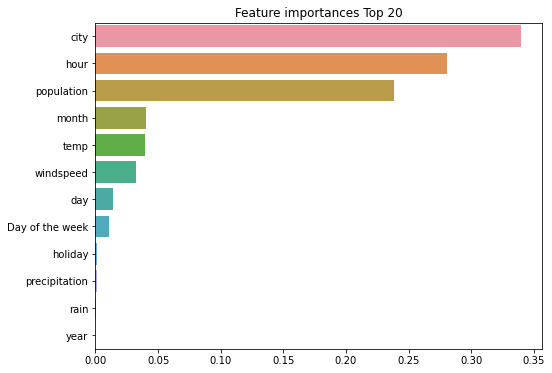

In [126]:
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()